### Análise de dados temporáis do Coronavirus

[worldometers com estatíticas sobre o coronavirus](https://www.worldometers.info/coronavirus/)

[link da origem do dados no github](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

Esta pasta contém tabelas de resumo de séries temporais diárias, incluindo confirmados, óbitos e recuperados. Todos os dados são lidos a partir do relatório diário do caso. As tabelas de séries temporais estão sujeitas a atualização caso sejam identificadas imprecisões em nossos dados históricos.

Duas tabelas de séries temporais são para os casos e mortes confirmados nos EUA, relatados no nível do condado. Eles são nomeados:
* time_series_covid19_confirmed_US.csv;
* time_series_covid19_deaths_US.csv.

Três tabelas de séries temporais são para os casos confirmados globais, casos recuperados e mortes. Austrália, Canadá e China são relatados em nível de província/estado. As dependências da Holanda, Reino Unido, França e Dinamarca estão listadas no nível de província/estado. Os EUA e outros países estão no nível de país. As tabelas são renomeadas como:
* time_series_covid19_confirmed_global.csv;
* time_series_covid19_deaths_global.csv;
* time_series_covid19_recovered_global.csv.

Frequência de atualização:
* Uma vez por dia por volta das 23:59 (UTC).

In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

### Leitura dos dados do arquivo (time_series_covid19_confirmed_global.csv)
Casos confirmados de infecção global</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [3]:
df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,208432,208435,208435,208502,208545,208552,208669,208669,208621,208627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334144,334153,334157,334157,334167,334177,334187,334203,334204,334211
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271369,271369,271376,271376,271378,271385,271386,271394,271394,271394
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47820,47839,47839,47839,47839,47839,47839,47850,47850,47850
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105184,105184


In [4]:
df_confirmados.shape

(289, 1115)

In [5]:
print(f'Quantidade de países presentes no arquivo - {df_confirmados["Country/Region"].count()}')


Quantidade de países presentes no arquivo - 289


In [39]:
print('Lista de países que compõe a base de dados:', end='\n\n')
_ = [print(f'{pais: <50}', end='') for pais in df_confirmados['Country/Region'].values]

Lista de países que compõe a base de dados:

Afghanistan                                       Albania                                           Algeria                                           Andorra                                           Angola                                            Antarctica                                        Antigua and Barbuda                               Argentina                                         Armenia                                           Australia                                         Australia                                         Australia                                         Australia                                         Australia                                         Australia                                         Australia                                         Australia                                         Austria                                           Azerbaijan                                        Baham

### Seleção de todas as datas presentes no dataframe

In [7]:
col_datas = df_confirmados.columns.tolist()[4:]
print(f'5 últimas data: {col_datas[-5:]}')

5 últimas data: ['2/1/23', '2/2/23', '2/3/23', '2/4/23', '2/5/23']


### Alguns países apresentam informações por Province/State	

In [8]:
filtro = df_confirmados['Country/Region'].value_counts() > 1
filtro[filtro.values]

China             True
Canada            True
United Kingdom    True
France            True
Australia         True
Netherlands       True
Denmark           True
New Zealand       True
Name: Country/Region, dtype: bool

### Sumarização para que seja apresentado totais por país

In [9]:
df_confirmados_by_country = df_confirmados[2:].groupby('Country/Region')[col_datas].sum()
df_confirmados_by_country.sample(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Angola,0,0,0,0,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105184,105184
Luxembourg,0,0,0,0,0,0,0,0,0,0,...,314481,314607,314607,314639,314731,314769,314867,314882,314882,314882
Bhutan,0,0,0,0,0,0,0,0,0,0,...,62598,62598,62598,62605,62605,62605,62605,62605,62605,62605
Sudan,0,0,0,0,0,0,0,0,0,0,...,63729,63736,63736,63742,63742,63754,63754,63754,63754,63754
North Macedonia,0,0,0,0,0,0,0,0,0,0,...,346428,346428,346428,346428,346428,346533,346533,346533,346533,346533
Tonga,0,0,0,0,0,0,0,0,0,0,...,16672,16734,16734,16734,16734,16734,16734,16779,16779,16779
Solomon Islands,0,0,0,0,0,0,0,0,0,0,...,24575,24575,24575,24575,24575,24575,24575,24575,24575,24575
Tunisia,0,0,0,0,0,0,0,0,0,0,...,1150278,1150278,1150278,1150278,1150356,1150356,1150356,1150356,1150356,1150356
Japan,2,2,2,2,4,4,7,7,11,15,...,32386992,32441774,32486503,32507929,32555047,32610584,32655883,32695807,32734388,32766847


### Gráfico apresentando a curva de casos confirmado no Brasil

In [10]:
quantidade_acumulada_atual = df_confirmados_by_country.loc['Brazil'][-1]
print(f'O número de casos acumulados até o momento é de - {quantidade_acumulada_atual}')

O número de casos acumulados até o momento é de - 36867401


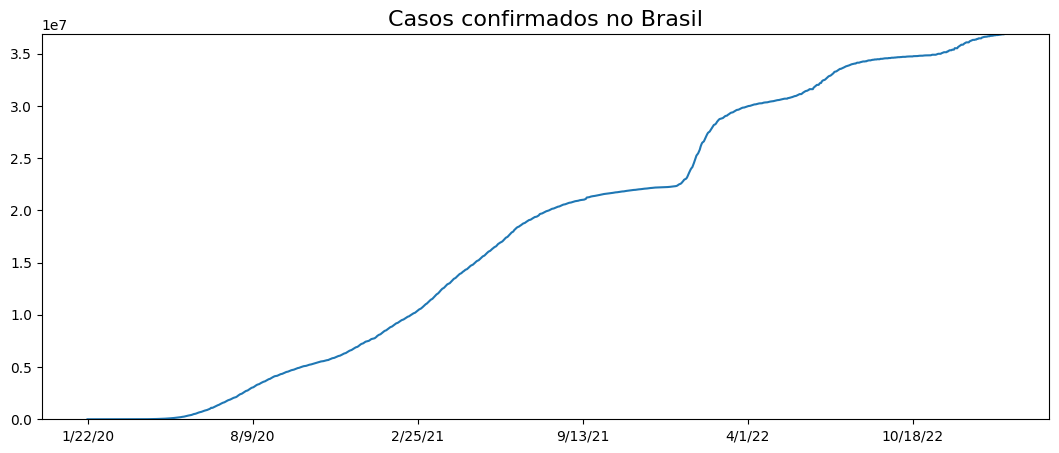

In [11]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil", fontsize=16)
df_confirmados_by_country.loc['Brazil'].plot()
plt.ylim(0, df_confirmados_by_country.loc['Brazil'][-1])
plt.show()

### Calculando a quantidade de casos confirmados por dia no Brasil
Calculando a diferença entre um dia e o dia anterior

In [12]:
minimo = min(df_confirmados_by_country.loc['Brazil'].diff().dropna())
print(f'Atenção a um possível erro na base de dados.')
print(f'Menor quantidade de casos confirmados em um dia - {minimo:.0f}')

Atenção a um possível erro na base de dados.
Menor quantidade de casos confirmados em um dia - -19796


In [13]:
maximo = max(df_confirmados_by_country.loc['Brazil'].diff().dropna())
print(f'Maior quantidade de casos confirmados em um dia - {maximo:.0f}')

Maior quantidade de casos confirmados em um dia - 287149


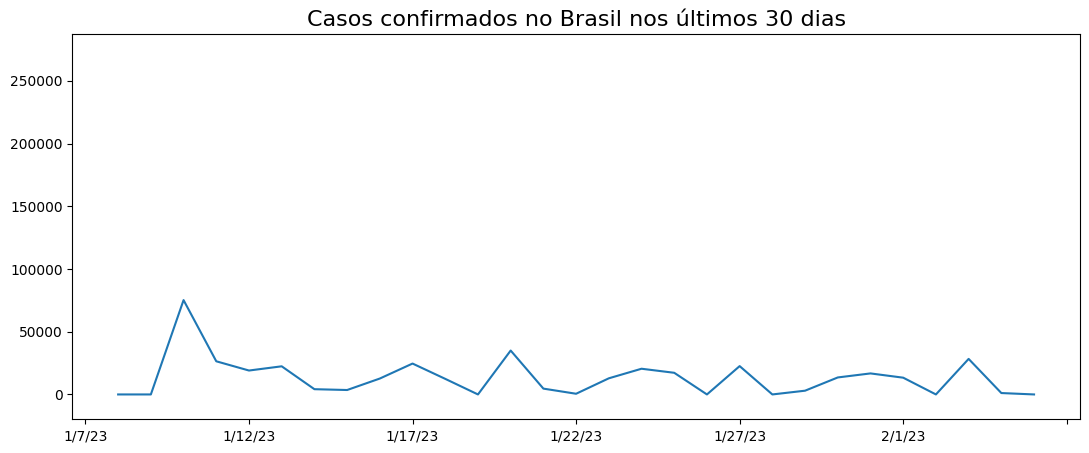

In [14]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil nos últimos 30 dias", fontsize=16)
plt.ylim(minimo, maximo)
df_confirmados_by_country.loc['Brazil'][-30:].diff().plot()
plt.show()

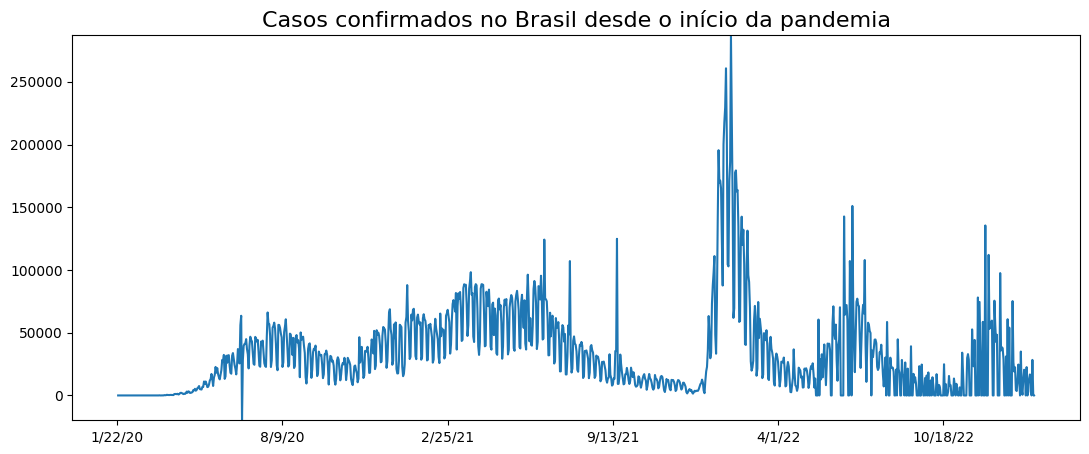

In [15]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil desde o início da pandemia", fontsize=16)
plt.ylim(minimo, maximo)
df_confirmados_by_country.loc['Brazil'].diff().plot()
plt.show()

### Comparativo entre todos os países até o momento

In [16]:
paises_maior_quantidade_casos_confirmados = df_confirmados_by_country[col_datas[-1]].sort_values(ascending=False)
paises_maior_quantidade_casos_confirmados[:30]

Country/Region
US                102592195
India              44684679
France             39741331
Germany            37822577
Brazil             36867401
Japan              32766847
Korea, South       30263261
Italy              25488166
United Kingdom     24526807
Russia             21687216
Turkey             17042722
Spain              13740531
Vietnam            11526566
Australia          11312904
Argentina          10037135
Taiwan*             9668845
Netherlands         8696317
Iran                7564756
Mexico              7389670
Indonesia           6731135
Poland              6383096
Colombia            6355135
Austria             5801078
Ukraine             5682632
Portugal            5564254
Greece              5548487
Chile               5128130
Malaysia            5037995
China               4903507
Israel              4788399
Name: 2/5/23, dtype: int64

In [17]:
acumulado_confirmados = paises_maior_quantidade_casos_confirmados.sum()

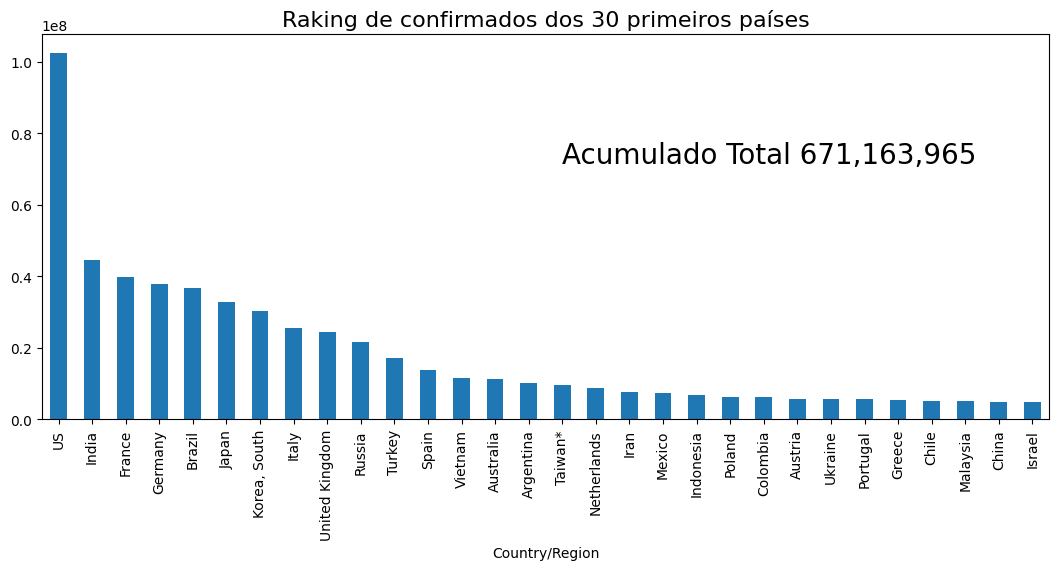

In [18]:
plt.figure(figsize=(13, 5))
plt.title("Raking de confirmados dos 30 primeiros países", fontsize=16)
plt.ylim(0, paises_maior_quantidade_casos_confirmados[0] * 1.05)
plt.annotate(f'Acumulado Total {acumulado_confirmados:,}', xy=(15, paises_maior_quantidade_casos_confirmados[0]*0.7), fontsize=20)
paises_maior_quantidade_casos_confirmados[:30].plot(kind='bar')
plt.show()

### Leitura dos dados do arquivo (time_series_covid19_deaths_global.csv)¶
Casos de mortes globais</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [19]:
df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_mortes.head()    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7875,7876,7876,7879,7882,7882,7891,7891,7894,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


### Leitura dos dados do arquivo (time_series_covid19_recovered_global.csv)¶
Casos recuperados globais</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [20]:
df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recuperados.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sumarização dos novos dados por país

In [21]:
df_mortes_by_country = df_mortes[2:].groupby('Country/Region')[col_datas].sum()
df_mortes_by_country.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Panama,0,0,0,0,0,0,0,0,0,0,...,8594,8594,8594,8594,8596,8596,8596,8596,8596,8596
Bolivia,0,0,0,0,0,0,0,0,0,0,...,22345,22345,22345,22345,22346,22349,22349,22350,22353,22353
Egypt,0,0,0,0,0,0,0,0,0,0,...,24805,24805,24805,24805,24805,24805,24806,24806,24806,24806
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
Mauritania,0,0,0,0,0,0,0,0,0,0,...,997,997,997,997,997,997,997,997,997,997


In [22]:
df_recuperados_by_country = df_recuperados[2:].groupby('Country/Region')[col_datas].sum()
df_recuperados_by_country.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New Zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tajikistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seychelles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ukraine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizando crescimento dos casos de mortes e de recuperados no Brasil 

In [23]:
acumulado_mortes = df_mortes_by_country.loc["Brazil"][-1]

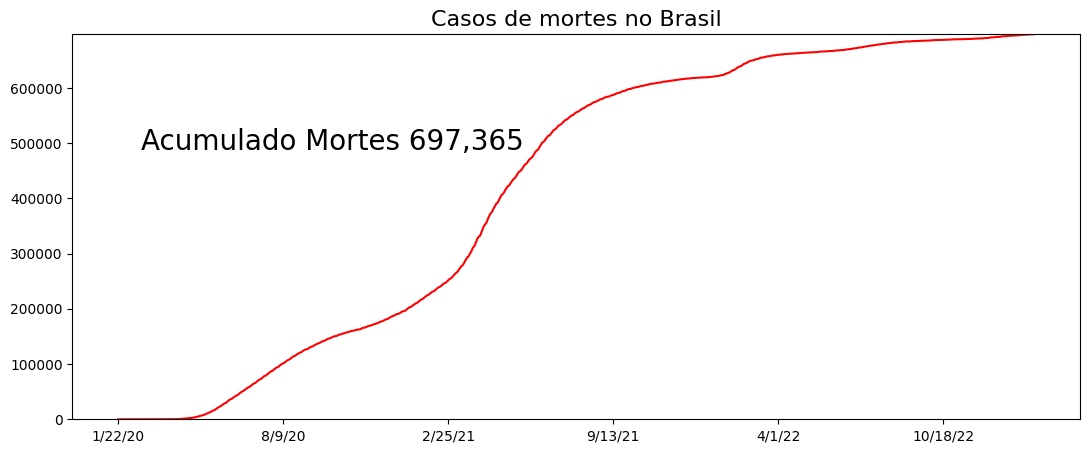

In [24]:
plt.figure(figsize=(13, 5))
plt.title("Casos de mortes no Brasil", fontsize=16)
plt.annotate(f'Acumulado Mortes {acumulado_mortes:,}', xy=(28, acumulado_mortes*0.7), fontsize=20)
df_mortes_by_country.loc['Brazil'].plot(color='red')
plt.ylim(0, df_mortes_by_country.loc['Brazil'][-1])
plt.show()

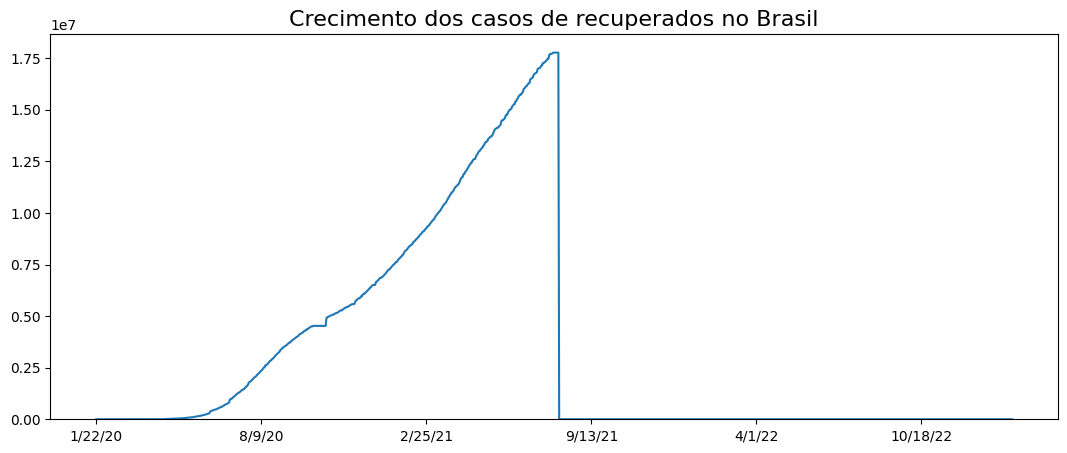

In [25]:
plt.figure(figsize=(13, 5))
plt.title("Crecimento dos casos de recuperados no Brasil", fontsize=16)
df_recuperados_by_country.loc['Brazil'].plot()
plt.ylim(0, max(df_recuperados_by_country.loc['Brazil']) * 1.05)
plt.show()

* <font color='red'>Observamos que totais de recuperados não são mais reportados.</font>

### Concatenando informações do último dia

In [26]:
print(f'Data do último dia disponibilizadob - {col_datas[-1]}')

Data do último dia disponibilizadob - 2/5/23


In [27]:
df_ultimo_dia = pd.concat(
    [
        df_confirmados_by_country[col_datas[-1]],
        df_recuperados_by_country[col_datas[-1]],
        df_mortes_by_country[col_datas[-1]]
    ],
    axis='columns'
)

df_ultimo_dia.columns = ['Confirmados', 'Recuperados', 'Mortes']

df_ultimo_dia.sample(5)

,Confirmados,Recuperados,Mortes
Country/Region,,,
Andorra,47850,0,165
Brazil,36867401,0,697365
Brunei,276067,0,225
Cabo Verde,63229,0,413
Burkina Faso,22025,0,396


### Calculando letalidade da Covid-19

In [28]:
percentual_letalidade = df_ultimo_dia.Mortes.sum() / df_ultimo_dia.Confirmados.sum()

print(f'A letalidade da covid-19 no mundo é de {(percentual_letalidade * 100):.3f}%')

A letalidade da covid-19 no mundo é de 1.018%


In [29]:
df_ultimo_dia['Letalidade %'] = (df_ultimo_dia.Mortes / df_ultimo_dia.Confirmados) * 100

df_ultimo_dia.sample(5)

,Confirmados,Recuperados,Mortes,Letalidade %
Country/Region,,,,
Malta,117062,0,824,0.703900
Mali,32790,0,743,2.265935
Lesotho,34790,0,723,2.078183
Solomon Islands,24575,0,153,0.622584
Georgia,1815871,0,16934,0.932555


In [30]:
print('Letalidade no Brasil')
pd.DataFrame(df_ultimo_dia.loc['Brazil']).T

Letalidade no Brasil


,Confirmados,Recuperados,Mortes,Letalidade %
Brazil,36867401.0,0.0,697365.0,1.891549


### Raking de letalidade da Covid-19

In [31]:
paises_maior_letalidade = df_ultimo_dia['Letalidade %'].sort_values(ascending=False)

for ind, pais in enumerate(paises_maior_letalidade.index):
    if pais == 'Brazil':
        print(f'{pais} na posição {ind+1}')

Brazil na posição 52


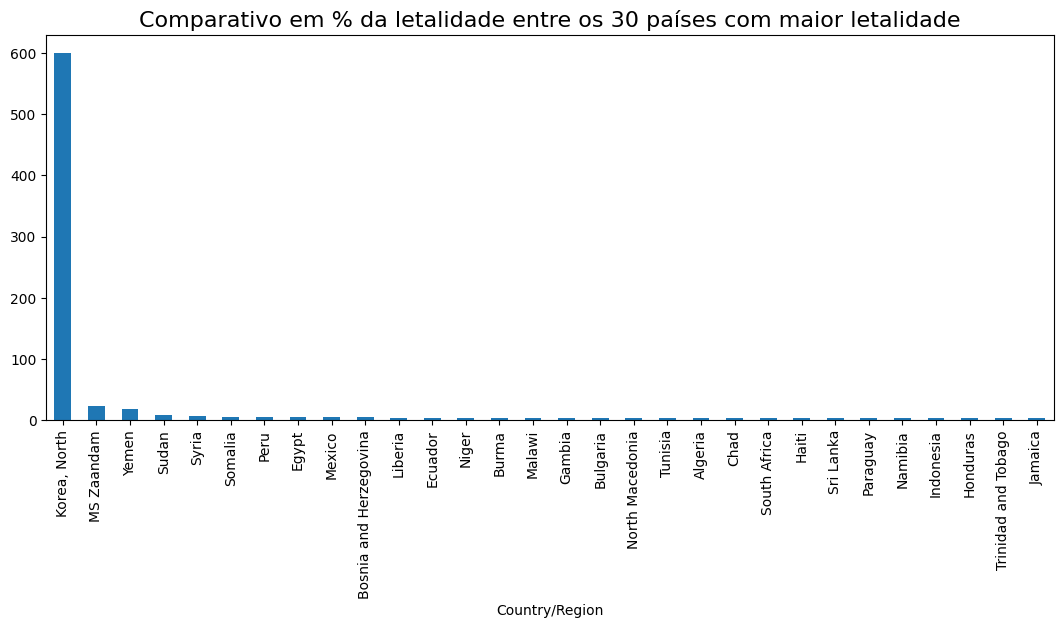

In [32]:
plt.figure(figsize=(13, 5))
plt.title("Comparativo em % da letalidade entre os 30 países com maior letalidade", fontsize=16)
plt.ylim(0, paises_maior_letalidade[0] * 1.05)
paises_maior_letalidade[:30].plot(kind='bar')
plt.show()

In [33]:
df_ultimo_dia.loc[paises_maior_letalidade.index[:10]]

,Confirmados,Recuperados,Mortes,Letalidade %
Country/Region,,,,
"Korea, North",1,0,6,600.000000
MS Zaandam,9,0,2,22.222222
Yemen,11945,0,2159,18.074508
Sudan,63754,0,5008,7.855193
Syria,57453,0,3164,5.507110
Somalia,27318,0,1361,4.982063
Peru,4482582,0,219195,4.889927
Egypt,515645,0,24806,4.810674
Mexico,7389670,0,332475,4.499186


### Visualizando se existe relação entre Confirmados e Mortes

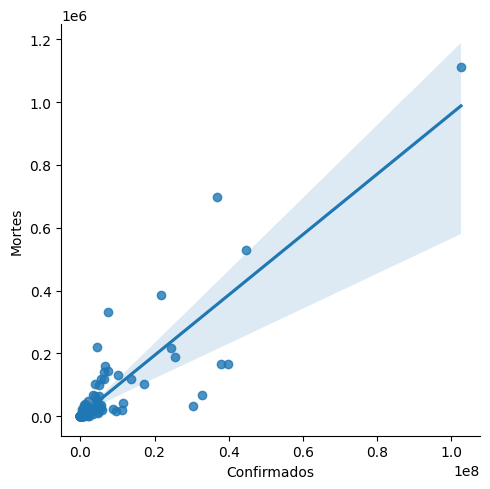

In [34]:
sns.lmplot(data=df_ultimo_dia, x='Confirmados', y='Mortes')

### rugplot - assemelha ao distplot demonstrando onde há maior a concentraçao

<AxesSubplot: xlabel='Letalidade %', ylabel='Density'>

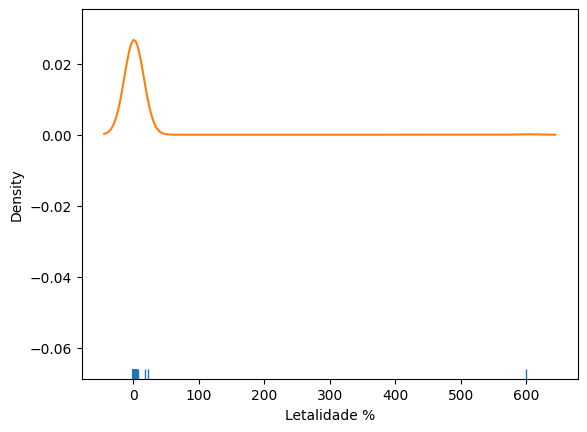

In [35]:
sns.rugplot(df_ultimo_dia['Letalidade %'])
sns.kdeplot(df_ultimo_dia['Letalidade %']) # Confirmando a maior concentração

<AxesSubplot: xlabel='Letalidade %', ylabel='Count'>

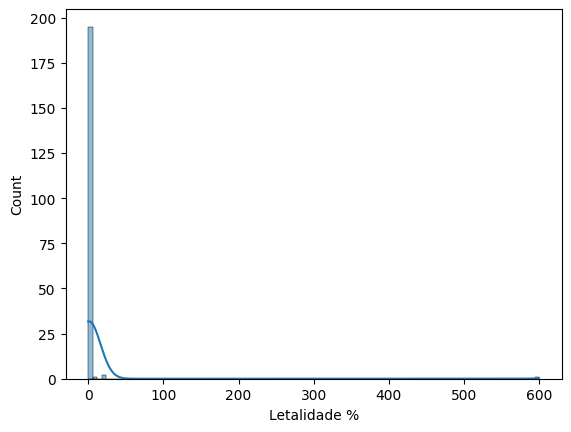

In [36]:
sns.histplot(df_ultimo_dia['Letalidade %'], bins=100, kde=True)